In [169]:
import networkx as nx
import random
import numpy as np
import scipy

from tqdm import tqdm

import matplotlib.pyplot as plt


# Naive implementation of Percolation

In [147]:
def ordinary_bond_percolation(G, p):
    """
    Performs ordinary bond percolation on a graph by randomly removing edges.
    
    Parameters:
        G (networkx.Graph): Input graph to perform percolation on
        p (float): Probability of keeping each edge (between 0 and 1)
        
    Returns:
        H (networkx.Graph): New graph with edges present with probability p
    """

    H = nx.Graph()  # generate an empty graph instance

    # add nodes to H
    for node in G.nodes():
        H.add_node(node)

    # add edges to H
    for edge in G.edges():
        if random.random() <= p:
            H.add_edge(edge[0], edge[1])
            
    return H

def ordinary_site_percolation(G, p):
    """
    Performs ordinary site percolation on a graph by randomly removing nodes.
    
    Parameters:
        G (networkx.Graph): Input graph to perform percolation on
        p (float): Probability of keeping each node (between 0 and 1)
        
    Returns:
        H (networkx.Graph): New graph with nodes present with probability p
    """

    # copy the input graph
    H = G.copy()

    # remove nodes from H with probability 1 - p (in other words, keep nodes with probability p)
    for node in G.nodes():
        if random.random() <= 1. - p:
            H.remove_node(node)

    return H

def compute_component_sizes(G):

    LCC = 0
    SLCC = 0
    
    components = sorted(nx.connected_components(G), key=len, reverse=True)

    if len(components) > 1:
        LCC = len(components[0])
        SLCC = len(components[1])
    
    else:
        # print(components)
        LCC = len(G.nodes())
        SLCC = 0

    return LCC, SLCC

def get_phase_diagram(G, p_range, num_samples, percolation_func):

    phase_diagram = {'p': [], 'LCC': [], 'SLCC': [], 'susceptibility': []}

    for p in p_range:
        print(f"Computing phase diagram for p = {p}")
        LCC_values = []
        SLCC_values = []

        for i in tqdm(range(num_samples)):
            H = percolation_func(G, p)
            LCC, SLCC = compute_component_sizes(H)

            LCC_values.append(LCC)
            SLCC_values.append(SLCC)

        LCC_values = np.array(LCC_values) / len(G.nodes())
        SLCC_values = np.array(SLCC_values) / len(G.nodes())

        LCC = np.mean(LCC_values)
        SLCC = np.mean(SLCC_values)
        susceptibility = (np.mean(np.power(LCC_values, 2)) - np.power(np.mean(LCC_values), 2))

        phase_diagram['p'].append(p)
        phase_diagram['LCC'].append(LCC)
        phase_diagram['SLCC'].append(SLCC)
        phase_diagram['susceptibility'].append(susceptibility)

    return phase_diagram
    

In [148]:
N = 1000
k = 5
E = int(N * k / 2)
G = nx.gnm_random_graph(N, E)

p_range = np.linspace(0.0, 1.0, 51)
num_samples = 100

bp_phase_diagram = get_phase_diagram(G, p_range, num_samples, ordinary_bond_percolation)
sp_phase_diagram = get_phase_diagram(G, p_range, num_samples, ordinary_site_percolation)


Computing phase diagram for p = 0.0


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 381.14it/s]


Computing phase diagram for p = 0.02


100%|██████████| 100/100 [00:00<00:00, 279.15it/s]


Computing phase diagram for p = 0.04


100%|██████████| 100/100 [00:00<00:00, 419.74it/s]


Computing phase diagram for p = 0.06


100%|██████████| 100/100 [00:00<00:00, 406.84it/s]


Computing phase diagram for p = 0.08


100%|██████████| 100/100 [00:00<00:00, 400.46it/s]


Computing phase diagram for p = 0.1


100%|██████████| 100/100 [00:00<00:00, 395.77it/s]


Computing phase diagram for p = 0.12


100%|██████████| 100/100 [00:00<00:00, 389.22it/s]


Computing phase diagram for p = 0.14


100%|██████████| 100/100 [00:00<00:00, 393.16it/s]


Computing phase diagram for p = 0.16


100%|██████████| 100/100 [00:00<00:00, 277.10it/s]


Computing phase diagram for p = 0.18


100%|██████████| 100/100 [00:00<00:00, 382.13it/s]


Computing phase diagram for p = 0.2


100%|██████████| 100/100 [00:00<00:00, 378.26it/s]


Computing phase diagram for p = 0.22


100%|██████████| 100/100 [00:00<00:00, 374.39it/s]


Computing phase diagram for p = 0.24


100%|██████████| 100/100 [00:00<00:00, 369.63it/s]


Computing phase diagram for p = 0.26


100%|██████████| 100/100 [00:00<00:00, 268.97it/s]


Computing phase diagram for p = 0.28


100%|██████████| 100/100 [00:00<00:00, 365.56it/s]


Computing phase diagram for p = 0.3


100%|██████████| 100/100 [00:00<00:00, 364.30it/s]


Computing phase diagram for p = 0.32


100%|██████████| 100/100 [00:00<00:00, 359.94it/s]


Computing phase diagram for p = 0.34


100%|██████████| 100/100 [00:00<00:00, 256.14it/s]


Computing phase diagram for p = 0.36


100%|██████████| 100/100 [00:00<00:00, 341.57it/s]


Computing phase diagram for p = 0.38


100%|██████████| 100/100 [00:00<00:00, 254.32it/s]


Computing phase diagram for p = 0.4


100%|██████████| 100/100 [00:00<00:00, 339.30it/s]


Computing phase diagram for p = 0.42


100%|██████████| 100/100 [00:00<00:00, 335.54it/s]


Computing phase diagram for p = 0.44


100%|██████████| 100/100 [00:00<00:00, 249.18it/s]


Computing phase diagram for p = 0.46


100%|██████████| 100/100 [00:00<00:00, 326.45it/s]


Computing phase diagram for p = 0.48


100%|██████████| 100/100 [00:00<00:00, 324.54it/s]


Computing phase diagram for p = 0.5


100%|██████████| 100/100 [00:00<00:00, 221.31it/s]


Computing phase diagram for p = 0.52


100%|██████████| 100/100 [00:00<00:00, 312.66it/s]


Computing phase diagram for p = 0.54


100%|██████████| 100/100 [00:00<00:00, 236.82it/s]


Computing phase diagram for p = 0.56


100%|██████████| 100/100 [00:00<00:00, 305.53it/s]


Computing phase diagram for p = 0.58


100%|██████████| 100/100 [00:00<00:00, 230.93it/s]


Computing phase diagram for p = 0.6


100%|██████████| 100/100 [00:00<00:00, 298.14it/s]


Computing phase diagram for p = 0.62


100%|██████████| 100/100 [00:00<00:00, 224.13it/s]


Computing phase diagram for p = 0.64


100%|██████████| 100/100 [00:00<00:00, 290.17it/s]


Computing phase diagram for p = 0.66


100%|██████████| 100/100 [00:00<00:00, 221.65it/s]


Computing phase diagram for p = 0.68


100%|██████████| 100/100 [00:00<00:00, 219.58it/s]


Computing phase diagram for p = 0.7000000000000001


100%|██████████| 100/100 [00:00<00:00, 277.86it/s]


Computing phase diagram for p = 0.72


100%|██████████| 100/100 [00:00<00:00, 215.35it/s]


Computing phase diagram for p = 0.74


100%|██████████| 100/100 [00:00<00:00, 275.12it/s]


Computing phase diagram for p = 0.76


100%|██████████| 100/100 [00:00<00:00, 211.54it/s]


Computing phase diagram for p = 0.78


100%|██████████| 100/100 [00:00<00:00, 209.63it/s]


Computing phase diagram for p = 0.8


100%|██████████| 100/100 [00:00<00:00, 263.02it/s]


Computing phase diagram for p = 0.8200000000000001


100%|██████████| 100/100 [00:00<00:00, 206.67it/s]


Computing phase diagram for p = 0.84


100%|██████████| 100/100 [00:00<00:00, 259.75it/s]


Computing phase diagram for p = 0.86


100%|██████████| 100/100 [00:00<00:00, 202.61it/s]


Computing phase diagram for p = 0.88


100%|██████████| 100/100 [00:00<00:00, 200.86it/s]


Computing phase diagram for p = 0.9


100%|██████████| 100/100 [00:00<00:00, 196.81it/s]


Computing phase diagram for p = 0.92


100%|██████████| 100/100 [00:00<00:00, 196.00it/s]


Computing phase diagram for p = 0.9400000000000001


100%|██████████| 100/100 [00:00<00:00, 243.49it/s]


Computing phase diagram for p = 0.96


100%|██████████| 100/100 [00:00<00:00, 194.42it/s]


Computing phase diagram for p = 0.98


100%|██████████| 100/100 [00:00<00:00, 238.21it/s]


Computing phase diagram for p = 1.0


100%|██████████| 100/100 [00:00<00:00, 190.44it/s]


Computing phase diagram for p = 0.0


100%|██████████| 100/100 [00:00<00:00, 146.43it/s]


Computing phase diagram for p = 0.02


100%|██████████| 100/100 [00:00<00:00, 144.27it/s]


Computing phase diagram for p = 0.04


100%|██████████| 100/100 [00:00<00:00, 143.62it/s]


Computing phase diagram for p = 0.06


100%|██████████| 100/100 [00:00<00:00, 143.91it/s]


Computing phase diagram for p = 0.08


100%|██████████| 100/100 [00:00<00:00, 144.15it/s]


Computing phase diagram for p = 0.1


100%|██████████| 100/100 [00:00<00:00, 143.85it/s]


Computing phase diagram for p = 0.12


100%|██████████| 100/100 [00:00<00:00, 143.07it/s]


Computing phase diagram for p = 0.14


100%|██████████| 100/100 [00:00<00:00, 124.19it/s]


Computing phase diagram for p = 0.16


100%|██████████| 100/100 [00:00<00:00, 143.02it/s]


Computing phase diagram for p = 0.18


100%|██████████| 100/100 [00:00<00:00, 124.51it/s]


Computing phase diagram for p = 0.2


100%|██████████| 100/100 [00:00<00:00, 142.37it/s]


Computing phase diagram for p = 0.22


100%|██████████| 100/100 [00:00<00:00, 123.87it/s]


Computing phase diagram for p = 0.24


100%|██████████| 100/100 [00:00<00:00, 143.02it/s]


Computing phase diagram for p = 0.26


100%|██████████| 100/100 [00:00<00:00, 125.47it/s]


Computing phase diagram for p = 0.28


100%|██████████| 100/100 [00:00<00:00, 144.21it/s]


Computing phase diagram for p = 0.3


100%|██████████| 100/100 [00:00<00:00, 144.41it/s]


Computing phase diagram for p = 0.32


100%|██████████| 100/100 [00:00<00:00, 144.66it/s]


Computing phase diagram for p = 0.34


100%|██████████| 100/100 [00:00<00:00, 143.88it/s]


Computing phase diagram for p = 0.36


100%|██████████| 100/100 [00:00<00:00, 125.73it/s]


Computing phase diagram for p = 0.38


100%|██████████| 100/100 [00:00<00:00, 144.47it/s]


Computing phase diagram for p = 0.4


100%|██████████| 100/100 [00:00<00:00, 144.10it/s]


Computing phase diagram for p = 0.42


100%|██████████| 100/100 [00:00<00:00, 143.76it/s]


Computing phase diagram for p = 0.44


100%|██████████| 100/100 [00:00<00:00, 143.95it/s]


Computing phase diagram for p = 0.46


100%|██████████| 100/100 [00:00<00:00, 124.48it/s]


Computing phase diagram for p = 0.48


100%|██████████| 100/100 [00:00<00:00, 143.73it/s]


Computing phase diagram for p = 0.5


100%|██████████| 100/100 [00:00<00:00, 144.76it/s]


Computing phase diagram for p = 0.52


100%|██████████| 100/100 [00:00<00:00, 125.71it/s]


Computing phase diagram for p = 0.54


100%|██████████| 100/100 [00:00<00:00, 125.03it/s]


Computing phase diagram for p = 0.56


100%|██████████| 100/100 [00:00<00:00, 143.23it/s]


Computing phase diagram for p = 0.58


100%|██████████| 100/100 [00:00<00:00, 124.30it/s]


Computing phase diagram for p = 0.6


100%|██████████| 100/100 [00:00<00:00, 125.48it/s]


Computing phase diagram for p = 0.62


100%|██████████| 100/100 [00:00<00:00, 144.80it/s]


Computing phase diagram for p = 0.64


100%|██████████| 100/100 [00:00<00:00, 144.92it/s]


Computing phase diagram for p = 0.66


100%|██████████| 100/100 [00:00<00:00, 126.33it/s]


Computing phase diagram for p = 0.68


100%|██████████| 100/100 [00:00<00:00, 145.05it/s]


Computing phase diagram for p = 0.7000000000000001


100%|██████████| 100/100 [00:00<00:00, 144.86it/s]


Computing phase diagram for p = 0.72


100%|██████████| 100/100 [00:00<00:00, 125.58it/s]


Computing phase diagram for p = 0.74


100%|██████████| 100/100 [00:00<00:00, 145.18it/s]


Computing phase diagram for p = 0.76


100%|██████████| 100/100 [00:00<00:00, 125.68it/s]


Computing phase diagram for p = 0.78


100%|██████████| 100/100 [00:00<00:00, 125.77it/s]


Computing phase diagram for p = 0.8


100%|██████████| 100/100 [00:00<00:00, 124.94it/s]


Computing phase diagram for p = 0.8200000000000001


100%|██████████| 100/100 [00:00<00:00, 125.82it/s]


Computing phase diagram for p = 0.84


100%|██████████| 100/100 [00:00<00:00, 145.26it/s]


Computing phase diagram for p = 0.86


100%|██████████| 100/100 [00:00<00:00, 126.54it/s]


Computing phase diagram for p = 0.88


100%|██████████| 100/100 [00:00<00:00, 144.80it/s]


Computing phase diagram for p = 0.9


100%|██████████| 100/100 [00:00<00:00, 144.33it/s]


Computing phase diagram for p = 0.92


100%|██████████| 100/100 [00:00<00:00, 126.31it/s]


Computing phase diagram for p = 0.9400000000000001


100%|██████████| 100/100 [00:00<00:00, 127.26it/s]


Computing phase diagram for p = 0.96


100%|██████████| 100/100 [00:00<00:00, 146.26it/s]


Computing phase diagram for p = 0.98


100%|██████████| 100/100 [00:00<00:00, 125.30it/s]


Computing phase diagram for p = 1.0


100%|██████████| 100/100 [00:00<00:00, 126.81it/s]


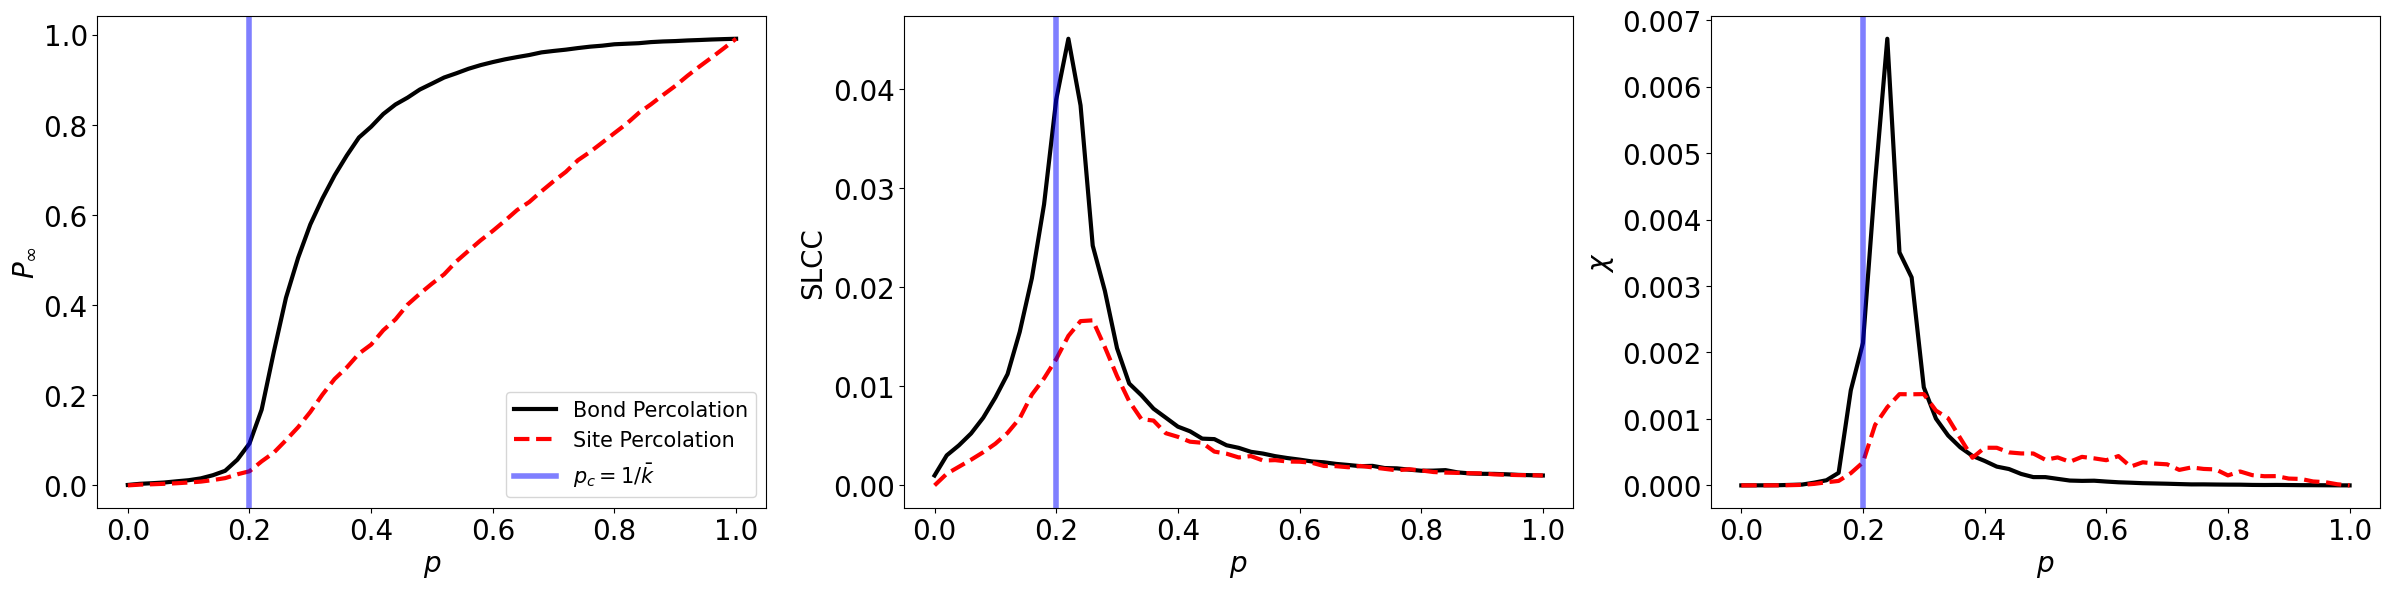

In [149]:
fig, ax = plt.subplots(ncols=3, figsize=(24, 6))

ax[0].plot(bp_phase_diagram['p'], bp_phase_diagram['LCC'], c='k', ls='-', lw=3., label=r'Bond Percolation')
ax[0].plot(sp_phase_diagram['p'], sp_phase_diagram['LCC'], c='r', ls='--', lw=3., label=r'Site Percolation')
ax[0].axvline(x=1/k, c='b', ls='-', alpha=0.5, lw=4, label=r'$p_c=1/\bar{k}$')

ax[0].set_xlabel(r'$p$', fontsize=20)
ax[0].set_ylabel(r'$P_{\infty}$', fontsize=20)
ax[0].tick_params('both', labelsize=20)
ax[0].legend(fontsize=15)

ax[1].plot(bp_phase_diagram['p'], bp_phase_diagram['SLCC'], c='k', ls='-', lw=3., label=r'Bond Percolation')
ax[1].plot(sp_phase_diagram['p'], sp_phase_diagram['SLCC'], c='r', ls='--', lw=3., label=r'Site Percolation')
ax[1].axvline(x=1/k, c='b', ls='-', alpha=0.5, lw=4, label=r'$p_c=1/\bar{k}$')

ax[1].set_xlabel(r'$p$', fontsize=20)
ax[1].set_ylabel(r'SLCC', fontsize=20)
ax[1].tick_params('both', labelsize=20)

ax[2].plot(bp_phase_diagram['p'], bp_phase_diagram['susceptibility'], c='k', ls='-', lw=3., label=r'Bond Percolation')
ax[2].plot(sp_phase_diagram['p'], sp_phase_diagram['susceptibility'], c='r', ls='--', lw=3., label=r'Site Percolation')
ax[2].axvline(x=1/k, c='b', ls='-', alpha=0.5, lw=4, label=r'$p_c=1/\bar{k}$')

ax[2].set_xlabel(r'$p$', fontsize=20)
ax[2].set_ylabel(r'$\chi$', fontsize=20)
ax[2].tick_params('both', labelsize=20)
# ax[1].legend(fontsize=15)

plt.tight_layout()
plt.show()

In [150]:
def random_pl(k_min, k_max, degree_exponent):
    tmp_max = np.power(k_max, 1.0-degree_exponent)
    tmp_min = np.power(k_min, 1.0-degree_exponent)
    return int(np.power( (tmp_max - (tmp_max - tmp_min) * random.random()), 1.0/(1.0-degree_exponent)))

N = 1000
degree_exponent = 2.1
k_min = 3
k_max = int(np.sqrt(N))


degree_sequence = [random_pl(k_min, k_max, degree_exponent) for n in range(N)]
if sum(degree_sequence) % 2 != 0:
    r = random.randint(0, N)
    degree_sequence[r] += 1

G = nx.configuration_model(degree_sequence)
G.remove_edges_from(nx.selfloop_edges(G))

# don't forget the nodes without any edges!
for n in range(N):
    G.add_node(n)



p_range = np.linspace(0.0, 1.0, 51)
num_samples = 100

bp_phase_diagram = get_phase_diagram(G, p_range, num_samples, ordinary_bond_percolation)
sp_phase_diagram = get_phase_diagram(G, p_range, num_samples, ordinary_site_percolation)


Computing phase diagram for p = 0.0


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 264.14it/s]


Computing phase diagram for p = 0.02


100%|██████████| 100/100 [00:00<00:00, 265.43it/s]


Computing phase diagram for p = 0.04


100%|██████████| 100/100 [00:00<00:00, 257.85it/s]


Computing phase diagram for p = 0.06


100%|██████████| 100/100 [00:00<00:00, 197.06it/s]


Computing phase diagram for p = 0.08


100%|██████████| 100/100 [00:00<00:00, 248.98it/s]


Computing phase diagram for p = 0.1


100%|██████████| 100/100 [00:00<00:00, 250.16it/s]


Computing phase diagram for p = 0.12


100%|██████████| 100/100 [00:00<00:00, 246.18it/s]


Computing phase diagram for p = 0.14


100%|██████████| 100/100 [00:00<00:00, 243.05it/s]


Computing phase diagram for p = 0.16


100%|██████████| 100/100 [00:00<00:00, 238.97it/s]


Computing phase diagram for p = 0.18


100%|██████████| 100/100 [00:00<00:00, 236.17it/s]


Computing phase diagram for p = 0.2


100%|██████████| 100/100 [00:00<00:00, 185.93it/s]


Computing phase diagram for p = 0.22


100%|██████████| 100/100 [00:00<00:00, 229.43it/s]


Computing phase diagram for p = 0.24


100%|██████████| 100/100 [00:00<00:00, 223.86it/s]


Computing phase diagram for p = 0.26


100%|██████████| 100/100 [00:00<00:00, 179.26it/s]


Computing phase diagram for p = 0.28


100%|██████████| 100/100 [00:00<00:00, 217.95it/s]


Computing phase diagram for p = 0.3


100%|██████████| 100/100 [00:00<00:00, 176.72it/s]


Computing phase diagram for p = 0.32


100%|██████████| 100/100 [00:00<00:00, 215.46it/s]


Computing phase diagram for p = 0.34


100%|██████████| 100/100 [00:00<00:00, 212.48it/s]


Computing phase diagram for p = 0.36


100%|██████████| 100/100 [00:00<00:00, 171.44it/s]


Computing phase diagram for p = 0.38


100%|██████████| 100/100 [00:00<00:00, 206.79it/s]


Computing phase diagram for p = 0.4


100%|██████████| 100/100 [00:00<00:00, 204.18it/s]


Computing phase diagram for p = 0.42


100%|██████████| 100/100 [00:00<00:00, 165.63it/s]


Computing phase diagram for p = 0.44


100%|██████████| 100/100 [00:00<00:00, 195.74it/s]


Computing phase diagram for p = 0.46


100%|██████████| 100/100 [00:00<00:00, 161.38it/s]


Computing phase diagram for p = 0.48


100%|██████████| 100/100 [00:00<00:00, 191.55it/s]


Computing phase diagram for p = 0.5


100%|██████████| 100/100 [00:00<00:00, 156.99it/s]


Computing phase diagram for p = 0.52


100%|██████████| 100/100 [00:00<00:00, 186.09it/s]


Computing phase diagram for p = 0.54


100%|██████████| 100/100 [00:00<00:00, 154.61it/s]


Computing phase diagram for p = 0.56


100%|██████████| 100/100 [00:00<00:00, 152.59it/s]


Computing phase diagram for p = 0.58


100%|██████████| 100/100 [00:00<00:00, 180.43it/s]


Computing phase diagram for p = 0.6


100%|██████████| 100/100 [00:00<00:00, 149.77it/s]


Computing phase diagram for p = 0.62


100%|██████████| 100/100 [00:00<00:00, 176.00it/s]


Computing phase diagram for p = 0.64


100%|██████████| 100/100 [00:00<00:00, 146.85it/s]


Computing phase diagram for p = 0.66


100%|██████████| 100/100 [00:00<00:00, 172.12it/s]


Computing phase diagram for p = 0.68


100%|██████████| 100/100 [00:00<00:00, 143.65it/s]


Computing phase diagram for p = 0.7000000000000001


100%|██████████| 100/100 [00:00<00:00, 142.18it/s]


Computing phase diagram for p = 0.72


100%|██████████| 100/100 [00:00<00:00, 140.98it/s]


Computing phase diagram for p = 0.74


100%|██████████| 100/100 [00:00<00:00, 163.14it/s]


Computing phase diagram for p = 0.76


100%|██████████| 100/100 [00:00<00:00, 137.18it/s]


Computing phase diagram for p = 0.78


100%|██████████| 100/100 [00:00<00:00, 138.12it/s]


Computing phase diagram for p = 0.8


100%|██████████| 100/100 [00:00<00:00, 136.59it/s]


Computing phase diagram for p = 0.8200000000000001


100%|██████████| 100/100 [00:00<00:00, 155.32it/s]


Computing phase diagram for p = 0.84


100%|██████████| 100/100 [00:00<00:00, 132.01it/s]


Computing phase diagram for p = 0.86


100%|██████████| 100/100 [00:00<00:00, 131.49it/s]


Computing phase diagram for p = 0.88


100%|██████████| 100/100 [00:00<00:00, 130.09it/s]


Computing phase diagram for p = 0.9


100%|██████████| 100/100 [00:00<00:00, 128.67it/s]


Computing phase diagram for p = 0.92


100%|██████████| 100/100 [00:00<00:00, 128.02it/s]


Computing phase diagram for p = 0.9400000000000001


100%|██████████| 100/100 [00:00<00:00, 126.85it/s]


Computing phase diagram for p = 0.96


100%|██████████| 100/100 [00:00<00:00, 125.70it/s]


Computing phase diagram for p = 0.98


100%|██████████| 100/100 [00:00<00:00, 125.52it/s]


Computing phase diagram for p = 1.0


100%|██████████| 100/100 [00:00<00:00, 124.65it/s]


Computing phase diagram for p = 0.0


100%|██████████| 100/100 [00:02<00:00, 45.04it/s]


Computing phase diagram for p = 0.02


100%|██████████| 100/100 [00:02<00:00, 42.58it/s]


Computing phase diagram for p = 0.04


100%|██████████| 100/100 [00:02<00:00, 44.75it/s]


Computing phase diagram for p = 0.06


100%|██████████| 100/100 [00:02<00:00, 44.72it/s]


Computing phase diagram for p = 0.08


100%|██████████| 100/100 [00:02<00:00, 44.25it/s]


Computing phase diagram for p = 0.1


100%|██████████| 100/100 [00:02<00:00, 44.42it/s]


Computing phase diagram for p = 0.12


100%|██████████| 100/100 [00:02<00:00, 46.82it/s]


Computing phase diagram for p = 0.14


100%|██████████| 100/100 [00:02<00:00, 42.25it/s]


Computing phase diagram for p = 0.16


100%|██████████| 100/100 [00:02<00:00, 46.83it/s]


Computing phase diagram for p = 0.18


100%|██████████| 100/100 [00:02<00:00, 44.38it/s]


Computing phase diagram for p = 0.2


100%|██████████| 100/100 [00:02<00:00, 44.31it/s]


Computing phase diagram for p = 0.22


100%|██████████| 100/100 [00:02<00:00, 46.70it/s]


Computing phase diagram for p = 0.24


100%|██████████| 100/100 [00:02<00:00, 43.98it/s]


Computing phase diagram for p = 0.26


100%|██████████| 100/100 [00:02<00:00, 44.36it/s]


Computing phase diagram for p = 0.28


100%|██████████| 100/100 [00:02<00:00, 44.29it/s]


Computing phase diagram for p = 0.3


100%|██████████| 100/100 [00:02<00:00, 46.97it/s]


Computing phase diagram for p = 0.32


100%|██████████| 100/100 [00:02<00:00, 44.38it/s]


Computing phase diagram for p = 0.34


100%|██████████| 100/100 [00:02<00:00, 46.88it/s]


Computing phase diagram for p = 0.36


100%|██████████| 100/100 [00:02<00:00, 42.41it/s]


Computing phase diagram for p = 0.38


100%|██████████| 100/100 [00:02<00:00, 46.98it/s]


Computing phase diagram for p = 0.4


100%|██████████| 100/100 [00:02<00:00, 42.18it/s]


Computing phase diagram for p = 0.42


100%|██████████| 100/100 [00:02<00:00, 46.93it/s]


Computing phase diagram for p = 0.44


100%|██████████| 100/100 [00:02<00:00, 42.31it/s]


Computing phase diagram for p = 0.46


100%|██████████| 100/100 [00:02<00:00, 44.55it/s]


Computing phase diagram for p = 0.48


100%|██████████| 100/100 [00:02<00:00, 42.36it/s]


Computing phase diagram for p = 0.5


100%|██████████| 100/100 [00:02<00:00, 44.22it/s]


Computing phase diagram for p = 0.52


100%|██████████| 100/100 [00:02<00:00, 42.31it/s]


Computing phase diagram for p = 0.54


100%|██████████| 100/100 [00:02<00:00, 44.44it/s]


Computing phase diagram for p = 0.56


100%|██████████| 100/100 [00:02<00:00, 42.28it/s]


Computing phase diagram for p = 0.58


100%|██████████| 100/100 [00:02<00:00, 42.32it/s]


Computing phase diagram for p = 0.6


100%|██████████| 100/100 [00:02<00:00, 44.49it/s]


Computing phase diagram for p = 0.62


100%|██████████| 100/100 [00:02<00:00, 40.37it/s]


Computing phase diagram for p = 0.64


100%|██████████| 100/100 [00:02<00:00, 42.29it/s]


Computing phase diagram for p = 0.66


100%|██████████| 100/100 [00:02<00:00, 42.38it/s]


Computing phase diagram for p = 0.68


100%|██████████| 100/100 [00:02<00:00, 42.29it/s]


Computing phase diagram for p = 0.7000000000000001


100%|██████████| 100/100 [00:02<00:00, 42.32it/s]


Computing phase diagram for p = 0.72


100%|██████████| 100/100 [00:02<00:00, 40.57it/s]


Computing phase diagram for p = 0.74


100%|██████████| 100/100 [00:02<00:00, 42.19it/s]


Computing phase diagram for p = 0.76


100%|██████████| 100/100 [00:02<00:00, 42.52it/s]


Computing phase diagram for p = 0.78


100%|██████████| 100/100 [00:02<00:00, 40.52it/s]


Computing phase diagram for p = 0.8


100%|██████████| 100/100 [00:02<00:00, 40.55it/s]


Computing phase diagram for p = 0.8200000000000001


100%|██████████| 100/100 [00:02<00:00, 40.24it/s]


Computing phase diagram for p = 0.84


100%|██████████| 100/100 [00:02<00:00, 42.25it/s]


Computing phase diagram for p = 0.86


100%|██████████| 100/100 [00:02<00:00, 40.50it/s]


Computing phase diagram for p = 0.88


100%|██████████| 100/100 [00:02<00:00, 38.73it/s]


Computing phase diagram for p = 0.9


100%|██████████| 100/100 [00:02<00:00, 40.34it/s]


Computing phase diagram for p = 0.92


100%|██████████| 100/100 [00:02<00:00, 40.41it/s]


Computing phase diagram for p = 0.9400000000000001


100%|██████████| 100/100 [00:02<00:00, 40.22it/s]


Computing phase diagram for p = 0.96


100%|██████████| 100/100 [00:02<00:00, 38.75it/s]


Computing phase diagram for p = 0.98


100%|██████████| 100/100 [00:02<00:00, 40.41it/s]


Computing phase diagram for p = 1.0


100%|██████████| 100/100 [00:02<00:00, 38.79it/s]


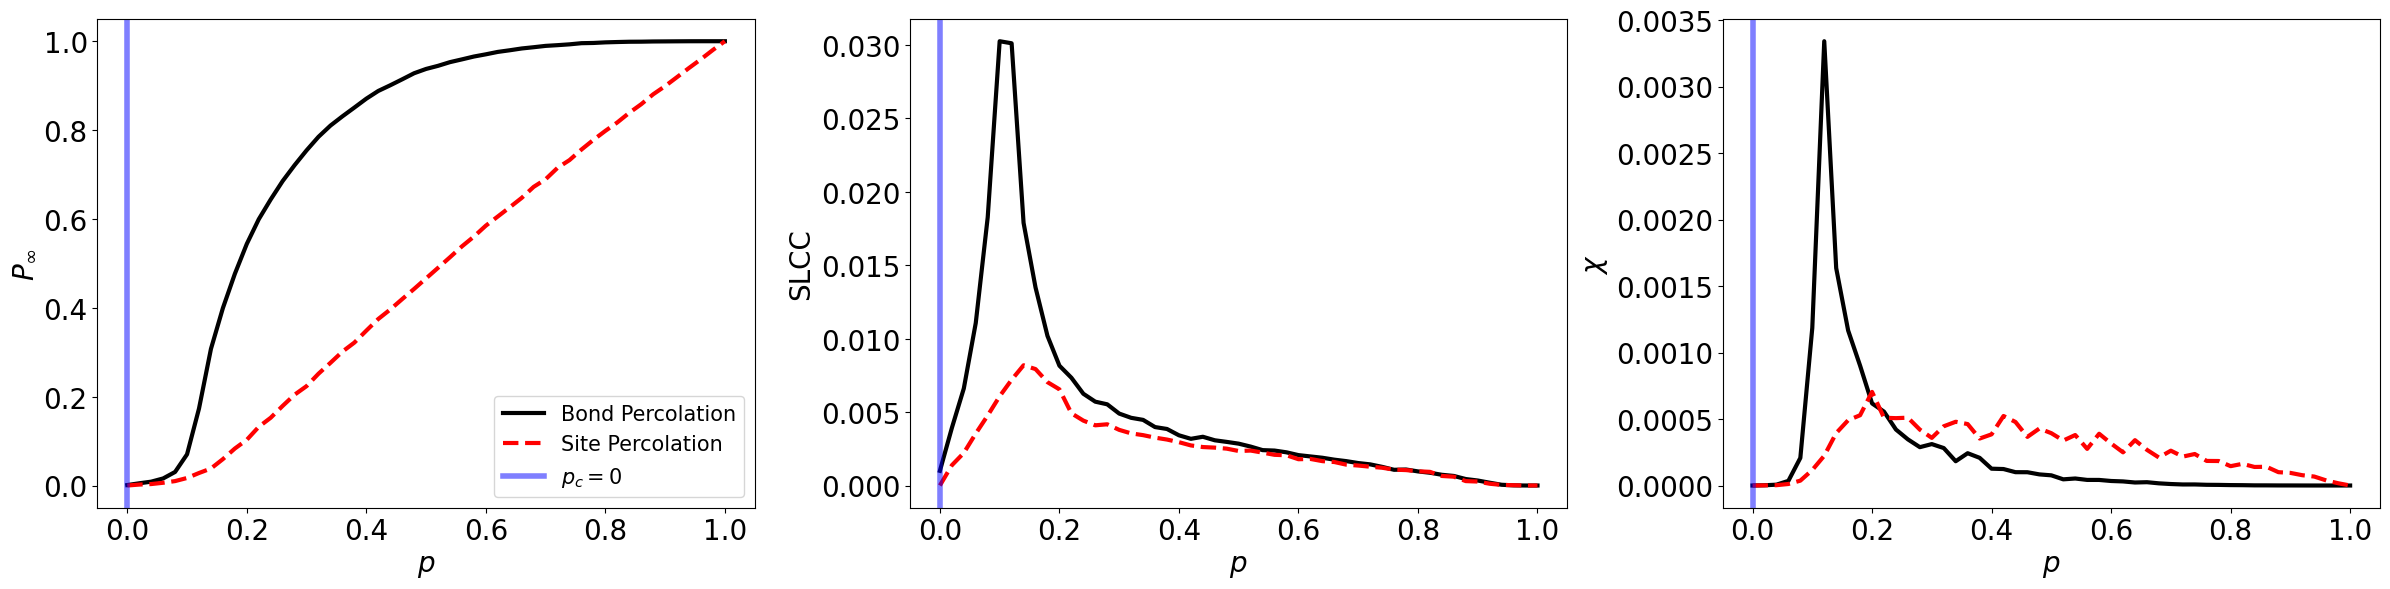

In [152]:
fig, ax = plt.subplots(ncols=3, figsize=(24, 6))

ax[0].plot(bp_phase_diagram['p'], bp_phase_diagram['LCC'], c='k', ls='-', lw=3., label=r'Bond Percolation')
ax[0].plot(sp_phase_diagram['p'], sp_phase_diagram['LCC'], c='r', ls='--', lw=3., label=r'Site Percolation')
ax[0].axvline(x=0., c='b', ls='-', alpha=0.5, lw=4, label=r'$p_c=0$')

ax[0].set_xlabel(r'$p$', fontsize=20)
ax[0].set_ylabel(r'$P_{\infty}$', fontsize=20)
ax[0].tick_params('both', labelsize=20)
ax[0].legend(fontsize=15)

ax[1].plot(bp_phase_diagram['p'], bp_phase_diagram['SLCC'], c='k', ls='-', lw=3., label=r'Bond Percolation')
ax[1].plot(sp_phase_diagram['p'], sp_phase_diagram['SLCC'], c='r', ls='--', lw=3., label=r'Site Percolation')
ax[1].axvline(x=0., c='b', ls='-', alpha=0.5, lw=4, label=r'$p_c=0$')

ax[1].set_xlabel(r'$p$', fontsize=20)
ax[1].set_ylabel(r'SLCC', fontsize=20)
ax[1].tick_params('both', labelsize=20)

ax[2].plot(bp_phase_diagram['p'], bp_phase_diagram['susceptibility'], c='k', ls='-', lw=3., label=r'Bond Percolation')
ax[2].plot(sp_phase_diagram['p'], sp_phase_diagram['susceptibility'], c='r', ls='--', lw=3., label=r'Site Percolation')
ax[2].axvline(x=0., c='b', ls='-', alpha=0.5, lw=4, label=r'$p_c=0$')

ax[2].set_xlabel(r'$p$', fontsize=20)
ax[2].set_ylabel(r'$\chi$', fontsize=20)
ax[2].tick_params('both', labelsize=20)
# ax[1].legend(fontsize=15)

plt.tight_layout()
plt.show()

# Newman-Ziff Algorithm 
M.E.J. Newman and R.M Ziff, [Efficient Monte Carlo Algorithm and High-Precision Results for Percolation](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.85.4104), Phys. Rev. Lett. 85, 4104 (2000)

Note that here, the definition $p$, which was the ``probability`` of remaining microscopic elements is now the actual ``fraciton`` of remaining microscopic elements. In other words, the NZ algorithm generates the phase diagram valid for ``Microcanonical Ensemble``. Thus, there should be some adjustment in the phase diagram to convert these raw results into results valid for ``Canonical Ensemble``. But I won't cover it here at this moment! 

In [153]:
def NZ_find_root(n, root):
    if root[n][0] == n:
        return root[n]
    return NZ_find_root(root[n][0], root)

def NZ_merge_clusters(n, m, root):

    root_n, size_n = NZ_find_root(n, root)  # root node and size of cluster that node n belongs to
    root_m, size_m = NZ_find_root(m, root)  # root node and size of cluster that node m belongs to

    # we only need to merge clusters if they belong to different clusters,
    # and we systematically merge the smaller cluster into the larger one
    if root_n != root_m:

        if size_n > size_m:
            root[root_m] = [root_n, 1]
            root[root_n] = [root_n, size_n + size_m]
            return root[root_n]
    
        else:
            root[root_n] = [root_m, 1]
            root[root_m] = [root_m, size_n + size_m]
            return root[root_m]
    
    else:
        return root[root_n]
    

def NZ_bond_percolation(G, num_samples):

    N = len(G.nodes())
    list_of_edges = list(G.edges())
    LCC_list = np.zeros(len(list_of_edges))
    susceptibility_list = np.zeros(len(list_of_edges))

    for _ in tqdm(range(num_samples)):

        random.shuffle(list_of_edges)

        root = {}
        for n in G.nodes():
            root[n] = [n, 1]
        
        P_infty = 1
        
        for i, edge in enumerate(list_of_edges):
            n, m = edge
            q, P = NZ_merge_clusters(n, m, root)
            if P > P_infty:
                P_infty = P
        
            LCC_list[i] += P_infty / N
            susceptibility_list[i] += (P_infty / N) * (P_infty / N)
        
    LCC_list /= num_samples
    susceptibility_list /= num_samples
    for i in range(len(LCC_list)):
        susceptibility_list[i] -= LCC_list[i] * LCC_list[i]

        if LCC_list[i] > 0.:
            susceptibility_list[i] /= LCC_list[i]

    return LCC_list, susceptibility_list


def NZ_site_percolation(G, num_samples):

    N = len(G.nodes())
    list_of_nodes = list(G.nodes())
    LCC_list = np.zeros(len(list_of_nodes))
    susceptibility_list = np.zeros(len(list_of_nodes))


    for _ in tqdm(range(num_samples)):
    
        # initial setup for current iteration
        random.shuffle(list_of_nodes)
        present = {}

        for n in list_of_nodes:
            present[n] = 0

        root = {}
        P_infty = 1

        # iterate over all nodes in random order
        for i in range(len(list_of_nodes)):
            n = list_of_nodes[i]
            present[n] = 1  # we mark the node as present
            root[n] = [n, 1]

            for m in G.neighbors(n):
                if present[m] > 0:  # we need to check if there are any present neighbors
                    q, P = NZ_merge_clusters(n, m, root)
                    if P > P_infty:
                        P_infty = P
            
            LCC_list[i] += P_infty / N
            susceptibility_list[i] += (P_infty / N) * (P_infty / N)
    
        
    LCC_list /= num_samples
    susceptibility_list /= num_samples
    for i in range(len(LCC_list)):
        susceptibility_list[i] -= LCC_list[i] * LCC_list[i]
        if LCC_list[i] > 0.:
            susceptibility_list[i] /= LCC_list[i]

    return LCC_list, susceptibility_list
    
    
    
    
    

In [154]:
N = 1000
k = 5
E = int(N * k / 2)
num_iterations = 1000

G = nx.gnm_random_graph(N, E)
bond_x = [i/E for i in range(E)]
site_x = [i/N for i in range(N)]

NZ_bond_LCC_list, NZ_bond_susceptibility_list = NZ_bond_percolation(G, num_iterations)
NZ_site_LCC_list, NZ_site_susceptibility_list = NZ_site_percolation(G, num_iterations)


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:04<00:00, 247.87it/s]


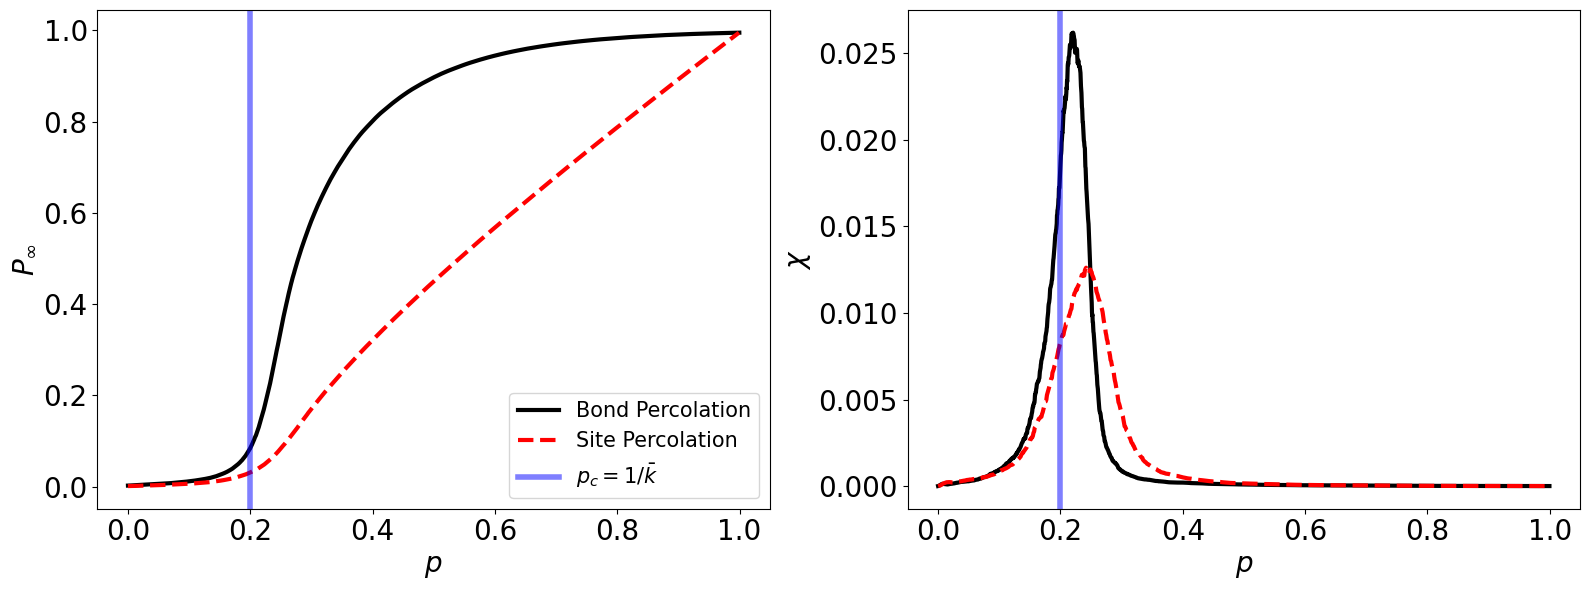

In [155]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 6))

ax[0].plot(bond_x, NZ_bond_LCC_list, c='k', ls='-', lw=3., label=r'Bond Percolation')
ax[0].plot(site_x, NZ_site_LCC_list, c='r', ls='--', lw=3., label=r'Site Percolation')
ax[0].axvline(x=1/k, c='b', ls='-', alpha=0.5, lw=4, label=r'$p_c=1/\bar{k}$')

ax[0].set_xlabel(r'$p$', fontsize=20)
ax[0].set_ylabel(r'$P_{\infty}$', fontsize=20)
ax[0].tick_params('both', labelsize=20)
ax[0].legend(fontsize=15)

ax[1].plot(bond_x, NZ_bond_susceptibility_list, c='k', ls='-', lw=3., label=r'Bond Percolation')
ax[1].plot(site_x, NZ_site_susceptibility_list, c='r', ls='--', lw=3., label=r'Site Percolation')
ax[1].axvline(x=1/k, c='b', ls='-', alpha=0.5, lw=4, label=r'$p_c=1/\bar{k}$')

ax[1].set_xlabel(r'$p$', fontsize=20)
ax[1].set_ylabel(r'$\chi$', fontsize=20)
ax[1].tick_params('both', labelsize=20)

plt.tight_layout()
plt.show()

In [156]:
N = 1000
degree_exponent = 2.1
k_min = 3
k_max = int(np.sqrt(N))


degree_sequence = [random_pl(k_min, k_max, degree_exponent) for n in range(N)]
if sum(degree_sequence) % 2 != 0:
    r = random.randint(0, N)
    degree_sequence[r] += 1

G = nx.configuration_model(degree_sequence)
G.remove_edges_from(nx.selfloop_edges(G))

# don't forget the nodes without any edges!
for n in range(N):
    G.add_node(n)

num_samples = 100
E = len(G.edges())

bond_x = [i/E for i in range(E)]
site_x = [i/N for i in range(N)]

NZ_bond_LCC_list, NZ_bond_susceptibility_list = NZ_bond_percolation(G, num_iterations)
NZ_site_LCC_list, NZ_site_susceptibility_list = NZ_site_percolation(G, num_iterations)


100%|██████████| 1000/1000 [00:05<00:00, 199.73it/s]


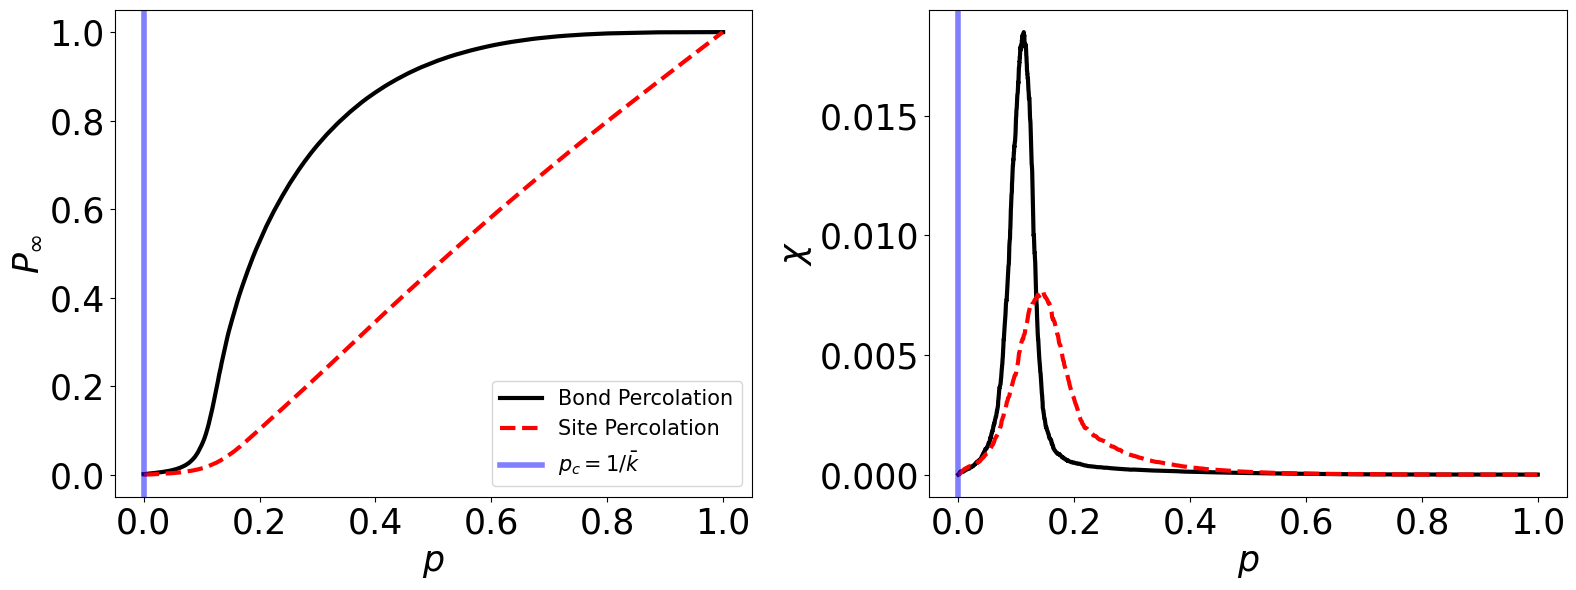

In [157]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 6))

ax[0].plot(bond_x, NZ_bond_LCC_list, c='k', ls='-', lw=3., label=r'Bond Percolation')
ax[0].plot(site_x, NZ_site_LCC_list, c='r', ls='--', lw=3., label=r'Site Percolation')
ax[0].axvline(x=0., c='b', ls='-', alpha=0.5, lw=4, label=r'$p_c=1/\bar{k}$')

ax[0].set_xlabel(r'$p$', fontsize=25)
ax[0].set_ylabel(r'$P_{\infty}$', fontsize=25)
ax[0].tick_params('both', labelsize=25)
ax[0].legend(fontsize=15)

ax[1].plot(bond_x, NZ_bond_susceptibility_list, c='k', ls='-', lw=3., label=r'Bond Percolation')
ax[1].plot(site_x, NZ_site_susceptibility_list, c='r', ls='--', lw=3., label=r'Site Percolation')
ax[1].axvline(x=0., c='b', ls='-', alpha=0.5, lw=4, label=r'$p_c=1/\bar{k}$')

ax[1].set_xlabel(r'$p$', fontsize=25)
ax[1].set_ylabel(r'$\chi$', fontsize=25)
ax[1].tick_params('both', labelsize=25)

plt.tight_layout()
plt.show()

# Message Passing Method

 The code makes use of the belief-propagation algorithm originally proposed by Brian Karrer, M. E. J. Newman, and Lenka Zdeborová, [Percolation on Sparse Networks](http://journals.aps.org/prl/abstract/10.1103/PhysRevLett.113.208702), Phys. Rev. Lett. 113, 208702 (2014), Kathleen E. Hamilton, and Leonid P. Pryadko, [Tight Lower Bound for Percolation Threshold on an Infinite Graph](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.113.208701), Phys. Rev. Lett. 113, 208701 (2014).
 
 The code below takes as inputs a graph $G$ and the value of the site/bond occupation probability $p$.

In [184]:
def message_passing_percolation_iteration(G, p, prob_edges):
    
    max_err = 0.0
    tmp_prob_edges = prob_edges.copy()
    
    for e in tmp_prob_edges:
        tmp_prob_edges[e] = prob_edges[e]
    
    for e in prob_edges:
        i = e[0]
        j = e[1]

        prob_edges[e] = 1.0
        for k in G.neighbors(j):
            if k != i:
                # Here, we are actually computing the probability
                # that node j is part of the largest cluster
                # without the contribution of node i
                prob_edges[e] = prob_edges[e] * (1.0 - p * tmp_prob_edges[(j, k)])
        
        # now we are changing the probability that node j is
        # not part of the largest cluster when node i is removed
        prob_edges[e] = 1.0 - prob_edges[e]
        err = np.abs(prob_edges[e] - tmp_prob_edges[e])
        if err > max_err:
            max_err = err
    return max_err


def solve_message_passing_percolation(G, p):
    prob_edges = {(e[0], e[1]): random.random() for e in G.edges()}
    prob_edges.update({(e[1], e[0]): random.random() for e in G.edges()})

    iteration = 0
    err = 1.0

    while err > 1e-6:
        err = message_passing_percolation_iteration(G, p, prob_edges)
        iteration += 1
        if iteration % 100 == 0:
            print(f"iteration {iteration}, err={err}")
    print(f"Converged in {iteration} iterations")
    
    return prob_edges
    
def get_percolation_diagram_from_message_passing(G, p_range):

    LCC_list = []

    for p in p_range:
        print(f"working on p={p}")
        prob_nodes = {n: 1.0 for n in G.nodes()}
        prob_edges = solve_message_passing_percolation(G, p)

        for e in prob_edges:
            n = e[0]
            # Here, we are actually computing the probability
            # that node n does not belong to the largest cluster
            prob_nodes[n] = prob_nodes[n] * (1.0 - p * prob_edges[e])

        P_infty = 0.0
        for n in G.nodes:
            # Now we are converting the previous probability
            # into the probability that node n belongs to the largest cluster
            prob_nodes[n] = 1.0 - prob_nodes[n]  
            P_infty += prob_nodes[n]

        P_infty /= len(G.nodes())

        LCC_list.append(P_infty)
    
    return LCC_list
        

def get_largest_eigen_pair_from_non_backtracking_matrix(G, method='manual'):

    M = nx.DiGraph()

    print("Constructing non-backtracking matrix:")
    for edge in tqdm(G.edges()):
        n = edge[0]
        m = edge[1]

        for q in G.neighbors(m):
            if q != n:
                M.add_edge((n, m), (m, q))
        
        for q in G.neighbors(n):
            if q != m:
                M.add_edge((m, n), (n, q))

    print("Computing largest eigenvalue pair:")
    if method == 'manual':

        eigen_vectors = {}
        for r in M:
            eigen_vectors[r] = 1.0

        err = 1.0
        iteration = 0
        while err > 1e-6:
            norm, err = single_step_power_iteration(M, eigen_vectors)
            iteration += 1
            if iteration % 100 == 0:
                print(f"iteration {iteration}, err={err}")
        print(f"Converged in {iteration} iterations")

    elif method == 'scipy':
        # Convert directed graph to adjacency matrix
        A = nx.adjacency_matrix(M).todense()
        # Get eigenvalues and eigenvectors using scipy
        eigenvalues, eigenvectors = scipy.linalg.eig(A)
        # Get index of largest eigenvalue
        max_idx = np.argmax(np.abs(eigenvalues))
        # Get largest eigenvalue and corresponding eigenvector
        norm = np.abs(eigenvalues[max_idx])
        # Convert eigenvector to dictionary format matching manual method
        eigen_vectors = {node: eigenvectors[i,max_idx] for i, node in enumerate(M.nodes())}

    return norm, eigen_vectors       

def single_step_power_iteration(M, eigen_vectors):

    tmp = eigen_vectors.copy()

    for r in eigen_vectors:
        eigen_vectors[r] = 0.0

        for q in M.predecessors(r):
            eigen_vectors[r] += tmp[q]
    
    norm = 0.0

    for r in eigen_vectors:
        norm += eigen_vectors[r] * eigen_vectors[r]
    norm = np.sqrt(norm)

    for r in eigen_vectors:
        eigen_vectors[r] /= norm

    err = 0.0
    for r in eigen_vectors:
        if abs(eigen_vectors[r] - tmp[r]) > err:
            err = abs(eigen_vectors[r] - tmp[r])
    
    return norm, err
            

In [173]:
N = 1000
k = 5
E = int(N * k / 2)

G = nx.gnm_random_graph(N, E)
p_list = np.linspace(0.0, 1.0, 51)

LCC_list = get_percolation_diagram_from_message_passing(G, p_list)

working on p=0.0
Converged in 2 iterations
working on p=0.02
Converged in 8 iterations
working on p=0.04
Converged in 10 iterations
working on p=0.06
Converged in 13 iterations
working on p=0.08
Converged in 16 iterations
working on p=0.1
Converged in 20 iterations
working on p=0.12
Converged in 26 iterations
working on p=0.14
Converged in 36 iterations
working on p=0.16
Converged in 53 iterations
working on p=0.18
Converged in 95 iterations
working on p=0.2
iteration 100, err=0.00047522579796221986
iteration 200, err=9.669990578509147e-05
iteration 300, err=2.9187884135861708e-05
iteration 400, err=9.843371145512592e-06
iteration 500, err=3.4437008515908474e-06
iteration 600, err=1.2202526545879167e-06
Converged in 620 iterations
working on p=0.22
iteration 100, err=3.1033684425585406e-06
Converged in 113 iterations
working on p=0.24
Converged in 58 iterations
working on p=0.26
Converged in 38 iterations
working on p=0.28
Converged in 23 iterations
working on p=0.3
Converged in 25 ite

In [174]:
N = 1000
k = 5
E = int(N * k / 2)
num_iterations = 1000

G = nx.gnm_random_graph(N, E)
bond_x = [i/E for i in range(E)]
site_x = [i/N for i in range(N)]

NZ_bond_LCC_list, NZ_bond_susceptibility_list = NZ_bond_percolation(G, num_iterations)
NZ_site_LCC_list, NZ_site_susceptibility_list = NZ_site_percolation(G, num_iterations)


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:03<00:00, 255.65it/s]


In [185]:
print("Computing largest eigenvalue pair manually")
lambda1, _ = get_largest_eigen_pair_from_non_backtracking_matrix(G, method='manual')

print("Computing largest eigenvalue pair using scipy")
lambda2, _ = get_largest_eigen_pair_from_non_backtracking_matrix(G, method='scipy')

print(lambda1, lambda2)
# print(lambda2)


Computing largest eigenvalue pair manually
Constructing non-backtracking matrix:


100%|██████████| 2500/2500 [00:00<00:00, 31104.22it/s]

Computing largest eigenvalue pair:


Converged in 14 iterations
Computing largest eigenvalue pair using scipy
Constructing non-backtracking matrix:


100%|██████████| 2500/2500 [00:00<00:00, 69428.79it/s]


Computing largest eigenvalue pair:
4.9262921881802875 4.926290935165811


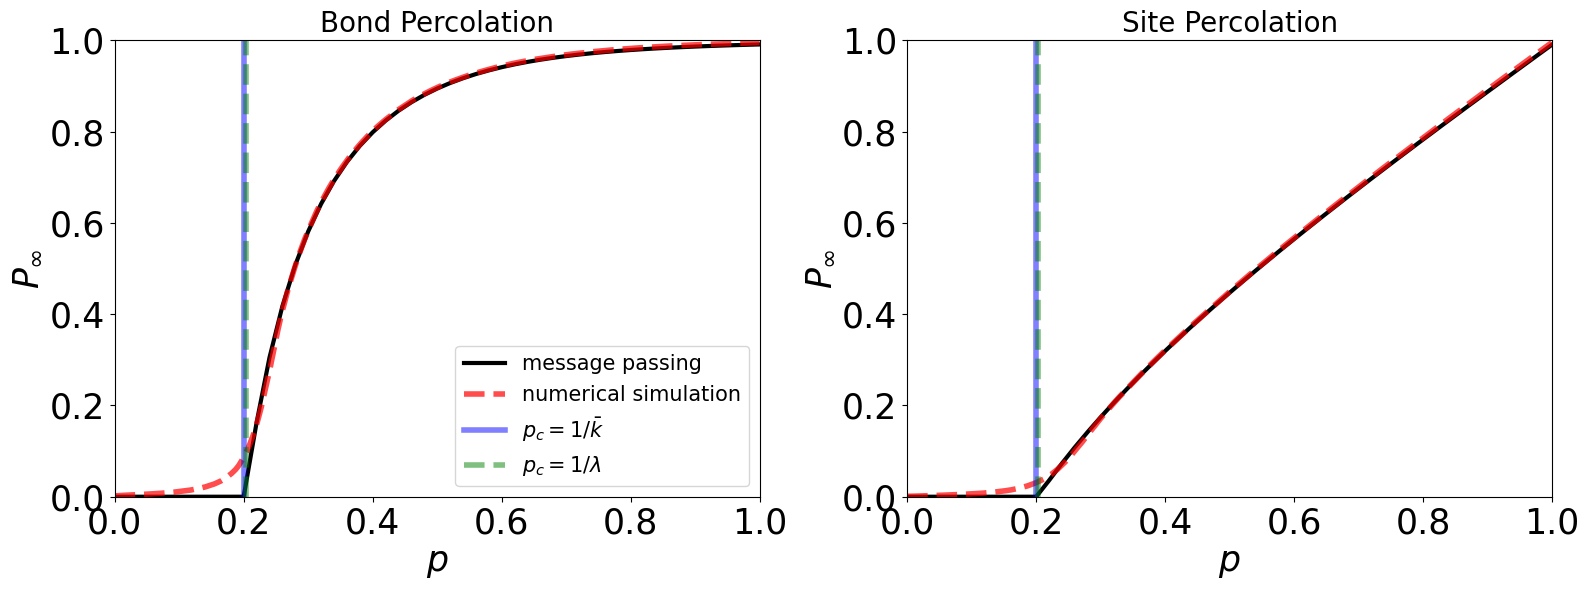

In [188]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 6))

ax[0].plot(p_list, LCC_list, 
           c='k', ls='-', lw=3., 
           label=r'message passing')
ax[0].plot(bond_x, NZ_bond_LCC_list, 
           c='r', ls='--', lw=4., alpha=0.7,
           label=r'numerical simulation')

ax[0].axvline(x=1/k, c='b', ls='-', alpha=0.5, lw=4, label=r'$p_c=1/\bar{k}$')
ax[0].axvline(x=1/lambda2, c='g', ls='--', alpha=0.5, lw=4, label=r'$p_c=1/\lambda$')

ax[0].set_xlabel(r'$p$', fontsize=25)
ax[0].set_ylabel(r'$P_{\infty}$', fontsize=25)
ax[0].tick_params('both', labelsize=25)
ax[0].set_xlim(0.0, 1.0)
ax[0].set_ylim(0.0, 1.0)
ax[0].legend(fontsize=15)


LCC_site = []
for i, p in enumerate(p_list):
    LCC_site.append(p*LCC_list[i])
ax[1].plot(p_list, LCC_site, 
           c='k', ls='-', lw=3.,
           label=r'message passing')
ax[1].plot(site_x, NZ_site_LCC_list, 
           c='r', ls='--', lw=4., alpha=0.7,
           label=r'numerical simulation')
ax[1].set_xlabel(r'$p$', fontsize=25)
ax[1].set_ylabel(r'$P_{\infty}$', fontsize=25)
ax[1].tick_params('both', labelsize=25)

ax[1].set_xlim(0.0, 1.0)
ax[1].set_ylim(0.0, 1.0)

ax[1].axvline(x=1/k, c='b', ls='-', alpha=0.5, lw=4, label=r'$p_c=1/\bar{k}$')
ax[1].axvline(x=1/lambda2, c='g', ls='--', alpha=0.5, lw=4, label=r'$p_c=1/\lambda$')


ax[0].set_title(r'Bond Percolation', fontsize=20)
ax[1].set_title(r'Site Percolation', fontsize=20)

plt.tight_layout()
plt.show()


In [189]:
N = 1000
degree_exponent = 2.1
k_min = 3
k_max = int(np.sqrt(N))


degree_sequence = [random_pl(k_min, k_max, degree_exponent) for n in range(N)]
if sum(degree_sequence) % 2 != 0:
    r = random.randint(0, N)
    degree_sequence[r] += 1

G = nx.configuration_model(degree_sequence)
G.remove_edges_from(nx.selfloop_edges(G))

# don't forget the nodes without any edges!
for n in range(N):
    G.add_node(n)

num_samples = 1000
E = len(G.edges())

bond_x = [i/E for i in range(E)]
site_x = [i/N for i in range(N)]

NZ_bond_LCC_list, NZ_bond_susceptibility_list = NZ_bond_percolation(G, num_samples)
NZ_site_LCC_list, NZ_site_susceptibility_list = NZ_site_percolation(G, num_samples)

p_list = np.linspace(0.0, 1.0, 51)
LCC_list = get_percolation_diagram_from_message_passing(G, p_list)

100%|██████████| 1000/1000 [00:05<00:00, 197.12it/s]


working on p=0.0
Converged in 2 iterations
working on p=0.02
Converged in 10 iterations
working on p=0.04
Converged in 17 iterations
working on p=0.06
Converged in 28 iterations
working on p=0.08
Converged in 62 iterations
working on p=0.1
iteration 100, err=0.00017872025733589592
iteration 200, err=7.1210221737061374e-06
Converged in 263 iterations
working on p=0.12
Converged in 50 iterations
working on p=0.14
Converged in 29 iterations
working on p=0.16
Converged in 18 iterations
working on p=0.18
Converged in 19 iterations
working on p=0.2
Converged in 17 iterations
working on p=0.22
Converged in 16 iterations
working on p=0.24
Converged in 15 iterations
working on p=0.26
Converged in 15 iterations
working on p=0.28
Converged in 14 iterations
working on p=0.3
Converged in 13 iterations
working on p=0.32
Converged in 13 iterations
working on p=0.34
Converged in 13 iterations
working on p=0.36
Converged in 12 iterations
working on p=0.38
Converged in 12 iterations
working on p=0.4
Con

In [190]:
print("Computing largest eigenvalue pair manually")
lambda1, _ = get_largest_eigen_pair_from_non_backtracking_matrix(G, method='manual')

print("Computing largest eigenvalue pair using scipy")
lambda2, _ = get_largest_eigen_pair_from_non_backtracking_matrix(G, method='scipy')

print(lambda1, lambda2)


Computing largest eigenvalue pair manually
Constructing non-backtracking matrix:


100%|██████████| 3515/3515 [00:00<00:00, 23700.67it/s]

Computing largest eigenvalue pair:


Converged in 10 iterations
Computing largest eigenvalue pair using scipy
Constructing non-backtracking matrix:


100%|██████████| 3515/3515 [00:00<00:00, 34123.32it/s]

Computing largest eigenvalue pair:


10.31801341792691 10.31800480229276


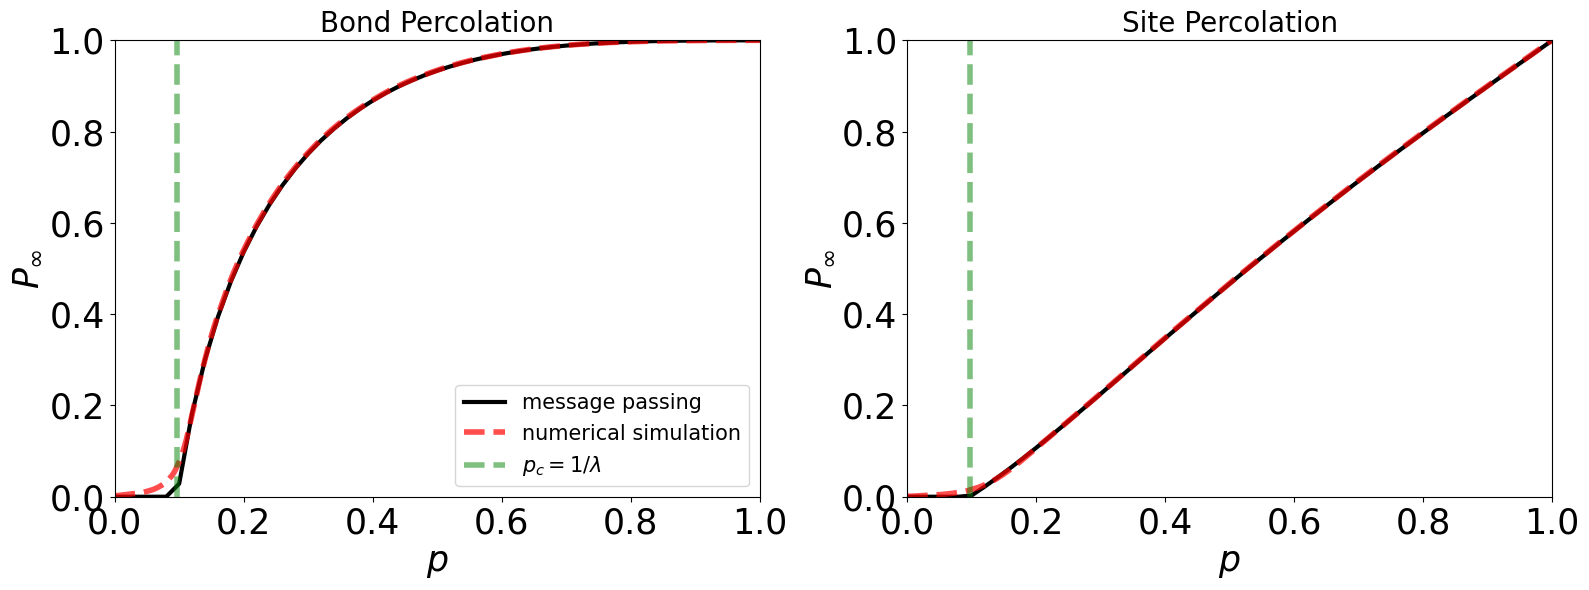

In [191]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 6))

ax[0].plot(p_list, LCC_list, 
           c='k', ls='-', lw=3., 
           label=r'message passing')
ax[0].plot(bond_x, NZ_bond_LCC_list, 
           c='r', ls='--', lw=4., alpha=0.7,
           label=r'numerical simulation')
ax[0].axvline(x=1/lambda2, c='g', ls='--', alpha=0.5, lw=4, label=r'$p_c=1/\lambda$')

ax[0].set_xlabel(r'$p$', fontsize=25)
ax[0].set_ylabel(r'$P_{\infty}$', fontsize=25)
ax[0].tick_params('both', labelsize=25)
ax[0].set_xlim(0.0, 1.0)
ax[0].set_ylim(0.0, 1.0)
ax[0].legend(fontsize=15)

LCC_site = []
for i, p in enumerate(p_list):
    LCC_site.append(p*LCC_list[i])
ax[1].plot(p_list, LCC_site, 
           c='k', ls='-', lw=3.,
           label=r'message passing')
ax[1].plot(site_x, NZ_site_LCC_list, 
           c='r', ls='--', lw=4., alpha=0.7,
           label=r'numerical simulation')

ax[1].axvline(x=1/lambda2, c='g', ls='--', alpha=0.5, lw=4, label=r'$p_c=1/\lambda$')
ax[1].set_xlabel(r'$p$', fontsize=25)
ax[1].set_ylabel(r'$P_{\infty}$', fontsize=25)
ax[1].set_xlim(0.0, 1.0)
ax[1].set_ylim(0.0, 1.0)
ax[1].tick_params('both', labelsize=25)


ax[0].set_title(r'Bond Percolation', fontsize=20)
ax[1].set_title(r'Site Percolation', fontsize=20)

plt.tight_layout()
plt.show()


# some cool visualization with message passing?

In [230]:
def message_passing_percolation_iteration(G, p, prob_edges):
    
    max_err = 0.0
    tmp_prob_edges = prob_edges.copy()
    
    for e in tmp_prob_edges:
        tmp_prob_edges[e] = prob_edges[e]
    
    for e in prob_edges:
        i = e[0]
        j = e[1]

        prob_edges[e] = 1.0
        for k in G.neighbors(j):
            if k != i:
                # Here, we are actually computing the probability
                # that node j is part of the largest cluster
                # without the contribution of node i
                prob_edges[e] = prob_edges[e] * (1.0 - p * tmp_prob_edges[(j, k)])
        
        # now we are changing the probability that node j is
        # not part of the largest cluster when node i is removed
        prob_edges[e] = 1.0 - prob_edges[e]
        err = np.abs(prob_edges[e] - tmp_prob_edges[e])
        if err > max_err:
            max_err = err
    return max_err


def modified_solve_message_passing_percolation(G, p):
    prob_edges = {(e[0], e[1]): random.random() for e in G.edges()}
    prob_edges.update({(e[1], e[0]): random.random() for e in G.edges()})
    list_prob_edges = []  # i want to keep track on the probability of each edge
    iteration = 0

    err = 1.0

    while err > 1e-6:
        err = message_passing_percolation_iteration(G, p, prob_edges)
        iteration += 1
        # if iteration % 100 == 0:
        print(f"iteration {iteration}, err={err}")
        tmp_prob_edges = prob_edges.copy()
        list_prob_edges.append(tmp_prob_edges)
    
    print(f"Converged in {iteration} iterations")
    
    return list_prob_edges
    
def modified_get_percolation_diagram_from_message_passing(G, p):

    LCC_list = []
    list_prob_nodes = []

    
    list_prob_edges = modified_solve_message_passing_percolation(G, p)

    for prob_edges in list_prob_edges:
        prob_nodes = {n: 1.0 for n in G.nodes()}

        for e in prob_edges:
            n = e[0]
            # Here, we are actually computing the probability
            # that node n does not belong to the largest cluster
            prob_nodes[n] = prob_nodes[n] * (1.0 - p * prob_edges[e])

        P_infty = 0.0
        for n in G.nodes:
            # Now we are converting the previous probability
            # into the probability that node n belongs to the largest cluster
            prob_nodes[n] = 1.0 - prob_nodes[n]  
            P_infty += prob_nodes[n]

        P_infty /= len(G.nodes())

        list_prob_nodes.append(prob_nodes)
        LCC_list.append(P_infty)
    return LCC_list, list_prob_nodes, list_prob_edges

In [292]:
N = 1000
k = 5
E = int(N * k / 2)
G = nx.gnm_random_graph(N, E)
p = 0.4
gcc_list, node_prob_list, edge_prob_list = modified_get_percolation_diagram_from_message_passing(G, p)
node_prob_list.insert(0, {i: random.random() for i in G.nodes()})
node_prob_list.insert(0, node_prob_list[0])
node_prob_list.insert(0, node_prob_list[0])

iteration 1, err=0.9810244373243109
iteration 2, err=0.5674938605757551
iteration 3, err=0.26695743558279594
iteration 4, err=0.10272723466507083
iteration 5, err=0.04224626692403555
iteration 6, err=0.019174945896936246
iteration 7, err=0.00680481459144755
iteration 8, err=0.002731894776507482
iteration 9, err=0.0011108684434082416
iteration 10, err=0.00045796427025701636
iteration 11, err=0.00018589139598657045
iteration 12, err=7.577442789963307e-05
iteration 13, err=3.129791049227837e-05
iteration 14, err=1.298243075231742e-05
iteration 15, err=5.3342560630831315e-06
iteration 16, err=2.1967546971479734e-06
iteration 17, err=9.024598218720925e-07
Converged in 17 iterations


In [293]:
len(node_prob_list)

20

In [294]:
from matplotlib.animation import FuncAnimation

# Create an animation showing the evolution of node probabilities
pos = nx.kamada_kawai_layout(G, scale=1.5)

# Set up the figure and axis with higher DPI and larger size
fig, ax = plt.subplots(figsize=(20, 18), dpi=250)
plt.close()

# Create a dummy scatter plot for the colorbar
dummy_scatter = ax.scatter([], [], c=[], cmap=plt.cm.RdBu, vmin=0, vmax=1)
cbar = plt.colorbar(dummy_scatter, ax=ax, label='Node Probability')
cbar.ax.tick_params(labelsize=20)  # Increase colorbar tick label size
cbar.set_label('Node Probability', size=25)  # Increase colorbar label size

# Function to update the plot for each frame
def update(frame):
    ax.clear()
    
    # Get node probabilities for this iteration
    node_probs = node_prob_list[frame]
    
    # Draw the network with larger nodes
    nodes = nx.draw_networkx_nodes(G, pos,
                                   node_color=[node_probs[node] for node in G.nodes()],
                                   node_size=100,  # Increased node size
                                   cmap="RdBu",
                                   vmin=0, vmax=1,
                                   ax=ax)
    nx.draw_networkx_edges(G, pos, alpha=0.2, ax=ax, width=2)  # Thicker edges
    
    if frame < 3:
        ax.set_title(f'Iteration 0', fontsize=25)  # Larger title font
    else:
        ax.set_title(f'Iteration {frame-2}', fontsize=25)  # Larger title font
    ax.axis('off')
    return nodes,

# Create the animation
anim = FuncAnimation(fig, update, 
                     frames=len(node_prob_list),
                     interval=500, # 500ms between frames
                     blit=True)

# Save the animation with higher quality
anim.save(f'percolation_animation_{p:.2f}.gif', writer='pillow', dpi=250)

plt.show()

<Figure size 640x480 with 0 Axes>

In [300]:
final_node_prob_list = []
p_list = np.linspace(0.0, 1.0, 101)

for p in p_list:
    gcc_list, node_prob_list, edge_prob_list = modified_get_percolation_diagram_from_message_passing(G, p)
    final_node_prob_list.append(node_prob_list[-1])

iteration 1, err=0.9993738587149695
iteration 2, err=0.0
Converged in 2 iterations
iteration 1, err=0.9993074778702294
iteration 2, err=0.06849790712634285
iteration 3, err=0.00312084945451363
iteration 4, err=0.00015088101763083284
iteration 5, err=7.3840175089934235e-06
iteration 6, err=3.614963718368003e-07
Converged in 6 iterations
iteration 1, err=0.9970074621534327
iteration 2, err=0.11440757999691953
iteration 3, err=0.010643730193700573
iteration 4, err=0.0011124982482837442
iteration 5, err=0.00010996866211043788
iteration 6, err=1.0903241007387265e-05
iteration 7, err=1.061367935539792e-06
iteration 8, err=1.048201176967467e-07
Converged in 8 iterations
iteration 1, err=0.9828450569876855
iteration 2, err=0.17164633480085
iteration 3, err=0.026761467150493323
iteration 4, err=0.003604486915039229
iteration 5, err=0.0005181127297969601
iteration 6, err=7.697721860999707e-05
iteration 7, err=1.1227361751742215e-05
iteration 8, err=1.6660221131559183e-06
iteration 9, err=2.46927

In [302]:
# Create an animation showing the evolution of node probabilities
pos = nx.kamada_kawai_layout(G, scale=1.5)

# Set up the figure and axis with higher DPI and larger size
fig, ax = plt.subplots(figsize=(20, 18), dpi=250)
plt.close()

# Create a dummy scatter plot for the colorbar
dummy_scatter = ax.scatter([], [], c=[], cmap=plt.cm.RdBu, vmin=0, vmax=1)
cbar = plt.colorbar(dummy_scatter, ax=ax, label='Node Probability')
cbar.ax.tick_params(labelsize=20)  # Increase colorbar tick label size
cbar.set_label('Node Probability', size=25)  # Increase colorbar label size

# Function to update the plot for each frame
def update(frame):
    ax.clear()
    
    # Get node probabilities for this iteration
    node_probs = final_node_prob_list[frame]
    
    # Draw the network with larger nodes
    nodes = nx.draw_networkx_nodes(G, pos,
                                   node_color=[node_probs[node] for node in G.nodes()],
                                   node_size=100,  # Increased node size
                                   cmap="RdBu",
                                   vmin=0, vmax=1,
                                   ax=ax)
    nx.draw_networkx_edges(G, pos, alpha=0.2, ax=ax, width=2)  # Thicker edges
    
    # if frame < 3:
    #     ax.set_title(f'Iteration 0', fontsize=25)  # Larger title font
    # else:
    #     ax.set_title(f'Iteration {frame-2}', fontsize=25)  # Larger title font
    ax.set_title(f"$p={p_list[frame]:.2f}$", fontsize=35)
    ax.axis('off')
    return nodes,

# Create the animation
anim = FuncAnimation(fig, update, 
                     frames=len(final_node_prob_list),
                     interval=100, # 500ms between frames
                     blit=True)

# Save the animation with higher quality
anim.save(f'percolation_transition.gif', writer='pillow', dpi=250)

plt.show()

<Figure size 640x480 with 0 Axes>